# 워드 클라우드

In [26]:
# 한글 폰트 사용(Matplotlib사용 전 기본 설정해주기)
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family = 'Malgun Gothic')
font1 = {'size':18, 'color':'green'}
mpl.rcParams['figure.figsize']=(12,6)
mpl.rcParams['font.size']=14

In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk import word_tokenize

import numpy as np
from PIL import Image

## Alice in WonderLand

In [76]:
text = open('data/wc1.alice.txt').read()
alice_mask = np.array(Image.open('data/wc2.alice_mask.png'))
words = word_tokenize(text)

stopwords = set(STOPWORDS)
stopwords.add("said")


In [73]:
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [68]:
len(STOPWORDS)

192

In [69]:
len(stopwords)

195

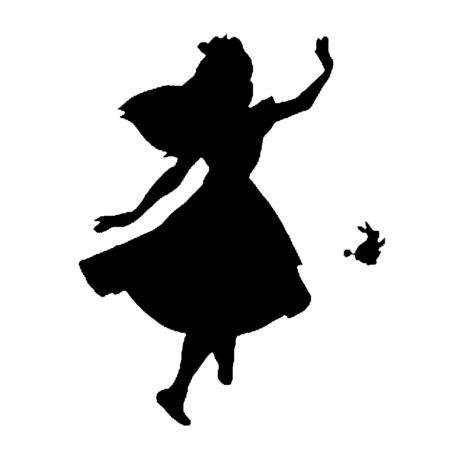

In [70]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [108]:
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [109]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords).generate(text)

wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.25956284153005466,
 'know': 0.2459016393442623,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'now': 0.16393442622950818,
 'went': 0.15846994535519127,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'well': 0.14754098360655737,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'head': 0.13114754098360656,
 'What': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11

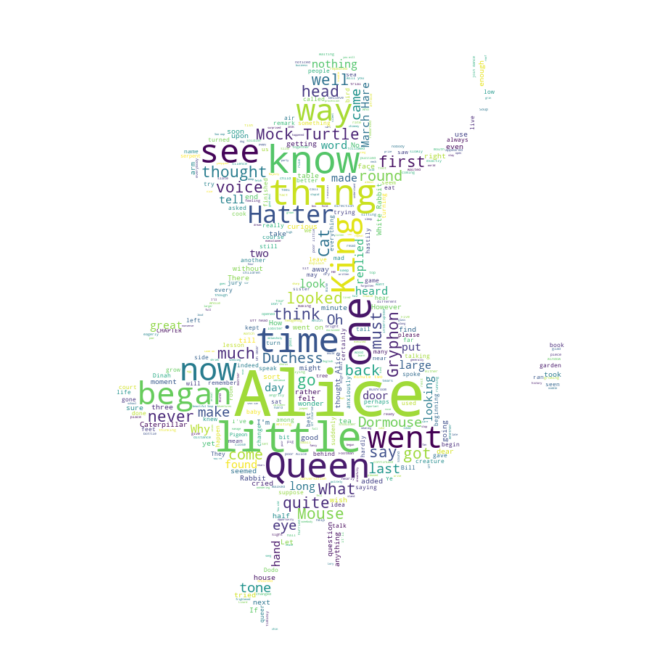

In [110]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 스타워즈

In [28]:

text = open('data/wc3.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/wc4.stormtrooper_mask.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'data/wc4.stormtrooper_mask.png'

In [117]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [ ]:
# Stopwords 제거
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [ ]:

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [ ]:
# HSL: 색조(hue), 포화(saturation), 밝기(lightness)
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwarbgs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [ ]:
s = 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
s

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

# 여자 친구 선물 고르기

In [4]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [34]:
html_ = 'https://kin.naver.com/search/list.nhn?'
html = html_ + 'query={key_word}&page={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")
dl_ = soup.find_all('dl')

In [35]:
tmp_list = []
for line in dl_:
    tmp_list.append(line.text)
    
tmp_list[:5]

['\n\n천여여친 선물 추\n\n2020.06.22.\n천여여친 선물 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여친선물로 뭘 줘야 할까요?\n\n2020.05.21.\n여친선물로 뭘 줘야 할까요?  안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n아빠가 어제 카드 주셔서 여친 선물\n\n2020.02.04.\n아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n정품문의 답변즘여 여친선물인데....\n\n2020.01.29.\n... 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다. 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요; \n\nQ&

In [36]:

import tqdm

present_candi_text = []
for n in tqdm.notebook.tqdm(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        line_str = line.text.replace('\t','').replace('\n','')
        present_candi_text.append(line_str)
        
    time.sleep(0.5)

In [37]:
with open('data/wc6.present_candi.txt', 'w', -1, 'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [38]:
present_candi_text

['여자친구 선물해주려구요2020.06.03.여자친구가 첨으로 독립을 하게되서 축하기념으로 선물하려하는데요 여자친구 선물은... 사양해요  여자친구 선물로 좀 특별한걸 선물해주세요 보면 생각이 자주나는걸로요... Q&A > 가족행사, 이벤트|답변수 5\xa0추천수 0',
 '20대여자친구선물 하카 전자담배... 2020.06.18.... 전자담배 중에 20대여자친구선물로 줄만한 것 찾고 있는데 하카 전자담배는 어떨지 궁금합니다.  안녕하세요 20대여자친구선물 하카 전자담배는 어떤지 고민중이시군요!... Q&A > 술, 담배|답변수 2\xa0추천수 0',
 '여자친구 선물 추천 부탁드립니다.(목걸이)2020.06.06.안녕하세요 여자친구 선물로 목걸이를 선물하고 싶어서 이렇게 글을 올립니다. 제가 쥬얼리 쪽은 브랜드가 어떻게 되어 있는지 잘 몰라서요. 20대 중반 저랑 동갑인... Q&A > 목걸이, 펜던트|답변수 6\xa0추천수 0',
 '여자친구 선물 추천 부탁드려요~2020.01.20.저기요...여자친구 선물 추천 좀 해 주세요~ 너무... 괜찮은 여자친구 선물 추천 부탁드립니다~  요즘 겨울이라서... 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨, 로션이... Q&A > 가족행사, 이벤트|답변수 39\xa0추천수 0',
 '여자친구 선물2020.04.29.여자친구 선물 로즈데이에 장미 외에 선물할 수 있는 게 있을까요? 아직 연애 초라서 여러가지 기념일을 많이 챙겨주고 싶네요.  저는 조금 특별한 선물을... #여자친구선물#여친선물#로즈데이선물Q&A > 가족행사, 이벤트|답변수 10\xa0추천수 0',
 '여자친구 선물로 감동적인게 뭐가... 2020.04.07.... 못하고요 여자친구 선물로 감동적인 것 좀 알려주세요  안녕하세요 여자친구 선물을 고민하고 계시군요 제가... 있더라고요 여자 친구 선물로 값비싼 선물보다 오래도록... Q&A > 목걸이, 펜던트|답변수 1\xa0추천수 0',
 '여자친구 선물 ..감동받게 하고 싶어요2020.01.0

In [39]:
len(present_candi_text)

1000

In [40]:
present_text = ''

for each_line in present_candi_text:
    present_text  += each_line + '\n'

In [41]:
from konlpy.tag import Okt
okt = Okt()

In [42]:
gifts = okt.nouns(present_text)
gifts[:10]

['여자친구', '선물', '여자친구', '독립', '축하', '기념', '선물', '여자친구', '선물', '양해']

In [43]:
import nltk
gifts = nltk.Text(gifts, name = '여자 친구 선물')
print(len(gift.tokens))
print(len(set(gift.tokens)))

25779
705


In [44]:
gifts.vocab().most_common(100)

[('선물', 3025),
 ('여자친구', 2952),
 ('목걸이', 2607),
 ('수', 2005),
 ('추천', 1955),
 ('답변', 1033),
 ('때', 878),
 ('중', 865),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 508),
 ('결혼', 364),
 ('고민', 300),
 ('상담', 142),
 ('이성', 140),
 ('쥬니버', 128),
 ('네이버', 123),
 ('용법', 123),
 ('가족', 92),
 ('이벤트', 92),
 ('행사', 89),
 ('내공', 79),
 ('초', 77),
 ('고', 74),
 ('문구', 67),
 ('중학생', 67),
 ('만년필', 65),
 ('미술', 65),
 ('용품', 65),
 ('좀', 46),
 ('제', 41),
 ('화장품', 34),
 ('뭐', 33),
 ('생각', 27),
 ('여자', 23),
 ('생일', 22),
 ('지갑', 22),
 ('화이트데이', 21),
 ('걸', 20),
 ('요', 20),
 ('저', 19),
 ('향수', 17),
 ('것', 16),
 ('가격', 16),
 ('크리스마스', 16),
 ('거', 15),
 ('이번', 15),
 ('커플', 14),
 ('로', 13),
 ('질문', 13),
 ('뭘', 12),
 ('게', 11),
 ('꽃', 11),
 ('반지', 11),
 ('쇼핑', 11),
 ('감동', 10),
 ('살', 10),
 ('브랜드', 9),
 ('기념일', 9),
 ('가방', 9),
 ('진짜', 9),
 ('의미', 9),
 ('곧', 9),
 ('정도', 9),
 ('전', 9),
 ('목도리', 9),
 ('중반', 8),
 ('친구', 8),
 ('카드', 8),
 ('이제', 8),
 ('팔찌', 8),

In [48]:
sw_text = ' '.join([str(elem) for elem in set(gifts.tokens)])
print(sw_text)

학생 고수 오렌지 신고 사랑 네 편지 유얼 음식 니트 빨강 밍 색 나중 용법 시구 체크 고등학교 왜 코스 쥬얼리 매 취미 반지 카드 군 직업 기초 가방 실용 파운데이션 무슨 서울 시간 끼 탈취 건 시티 다음주 데 인 자주 우편 수제 지금 중국 그게 네이션 머 오빠 상담 입문 호가 링 무엇 첫 마리오 겨울 공주 참고 초딩 최대 하카 팔찌 것 이직 수수 만년필 대학입학 팟 대요 우정 후드 속옷 를 사주면 옷 마우스패드 비밀연애 이하 기타 사실 피 꾸띠르 하니 저가 브랜드 게이 살껀데 오즈 후 워터 재료 조언 더 색상 너 노트북 박 적극 달달 취업 신경 명절 부탁 막상 전부 그것 대도 에센스 크리스마스 주문 결과 방송 이벤트 중동 메세지 확인 돈 가족 용도 뭐 학년 대해 항상 회사 떄 투맨 세럼 카메라 잉크 행사 쪼금 금함 질문 답변 장미꽃 행동 일주일 미투데이 파티 가격 인터넷 마디 시계 놀이 악세사리 잡고 함 패션 너클 향 대학 거나 줄 용품 제일 티셔츠 쇼 편도 샤넬 선물 캠코더 신발 반나절 세트 추천 언니 감동 진짜 용산 그냥 축하 연상연하 럼 연말 슬 미만 르블랑 셜 대학생 그룹 전역 술 이어폰 만 확행 건즈더듀얼 포장 매일 체형 요즘 머그컵 드림 순간 초등학생 토닥토닥 라면 드림캐쳐 프리저 화장 얼굴 티 생각 제 크롬 모바일폰 강남 립스틱 음질 초등학교 노미 주니 루미 고향 제이콥 차라리 발레 플라워 목도리 완전 동갑 의식 용인 겟잇뷰티 한편 스킨 대충 치 쿠키 거도 어쨌든 모델 거의 래서 센스 홀로 광장 서여 실버 님들 사양 상자 우선 말씀 해주 여자친구 기념 한지 고등학생 도대체 이자 별로 계획 살 내내 다이아 오늘 벨벳 접 맛 분 레몬 저녁 홍 직접 글 불가리 향수 후반 발렌타인데이 교환학생 아래 또 곧 정도 루 연인 달 플립 일찍 손바닥 하나 로션 대면 말 정 맥 걸 백화점 채팅 초콜렛 제격 백 초반 소개 사업자 계절 구피 다이어트 가지 근방 나이 영양 구류 디올 일단 고 애니메이션 괸찮치만 담배 펄찌 등 제주도 사려 미술 주 화이트데이 이름 추억

In [49]:
sw_text = '''별로 생일 반 직업 고생 취미 도대체 군대 쪼금 여친 재료 곳 
 만원 인 성인 사업자 한번 전여자친구 전 확인 리얼 연상연하 햇빛 후 풍속
 애 럼 괸찮치만 한민 언제 하여튼 동안 자주 호가 살이 겟잇뷰티 데이트 
 저 머 실용 전역 욕설 정도 매 둿 슬 연인 통화 먼저 음 줄 만들기 살껀데
  비밀연애 가을 무슨 게이 포함 때 컬러 로 섬유 손바닥 브랜드 준비 크게
  드림 성의 팟 블랙 자 하니 고 가성 점점 대학생 제대로 셀 윈도우 
  쪽 방학 공주 구류 아이디어 의식 사서 최근 남성 여자 주위 음질 신발
  미만 중후 현재 중고 피 정성 제격 산물 시티 신경 중지 요 독립 사이트
  겸 매일 반나절 용도 중국 서울 퍼온거 이 얼마 바 완전 그것 의견 일찍
  센스 일 점 청계 맛 조언 좀 검 기념 지역 고수 오빠 전부 초반 네이버
  상큼 순간 당장 기 최대 연애 축하 부담 추억 고해 고급 안 은행 빼빼로데이
  벌써 교환학생 타이밍 만 스 신고 다시 결혼 리스트 하루 해도 친구 용 티
  시내 그룹 거의 강남 의미 개 대면 시간 사양 용산 병영 셜 건 기초 수제
  보증 실버 움 진 사려 방송 친 가격 뒤 선물 잡화 우편 기타 여러가지 토 거
  화이트데이 얘기 결과 예상 기도 이직 둘 은근 말씀 명절 날 백화점 해주시
  주년 참고 대학 쭈니 달 장미 대요 고향 준 용법 지방선거 나중 거도 군 말
  오늘 값 빼 사주면 꿈 선 생각 봣 게 대해 후반 작업 가장 교통 이벤트 찬
  아래 잡고 일주일 꼭 이자 얼굴 치 번 도움 수수 남자 사람과 여자친구 날씨
  소개 마음 뭘 막상 친한친구 질문 초딩 용품 양산 힘 저녁 일단 졸업식
  제일 리버 첫 해 려고 를 주니 상품 수 다음 감동 행사 비 부 크리스마스
  계절 편도 문제 채팅 상담 인기 직접 그동안 중 기억 마디 상자 원래 종류
  분 박 밥 동갑 관리 색상 철 행정 연락 메모리 이제 덕후 무협 가요 하트
  저가 제주도 달달 답변 쥬니버 다음주 파티 초등학생 연말 탈취 때문 학교생활
  저번 부분 진주 해주 누가 베스트 접 정말 정해 요즘 여름 버스 내공 한지
  때매 목 대도 길찾기 기념일 곧 종합 광장 제 모델 뭐 가기 활용 안나 빨강
  양해 원데이 데 강추 루 홀로 외 차라리 네 의류 학기 티셔츠 주 학년 색깔
  손가락 피부 살 언니 땜 중학생 이성 처음 님들 부모님 혹시 제외 건강 생활
  소나기 추천 우정 미리 등 광역 더 떄 왜 택배 예비 고요 백 금함 중반 조금
  며칠 이요 이번 겨울 라면 끼 항상 송이 고민 전화 테크 함 액션 저기 기분
  무엇 고삼 주문 빵 처럼 홍 커플 거리 용인 브드 체크 오락 팩트 여행 그냥
  쇼핑 포장 그 체형 전문 졸업 내내 지식인 근방 확행 정식 핸드 부탁 초등학교
  그게 현금 회사 한편 경우 이하 가족 이중 학생 어쨌든 대충 여성 화장 영상
  영구 발렌타인 너 하루하루 최고 꽃집 지금 토닥토닥 세트 이틀 사람 걸
  볶음 제품 코미디 모두 하나 사랑 사실 지식 놀이 등등 발렌타인데이 진짜
  플립 데이 적극 민원 재회 존경 시구 무료 행동 고등학교 대비 인터넷 서여
  립스틱 위 나이 김 쇼 글구 구 무난 것 색 성분  일주년 메이커 다른 우선
  정 여동생 계획 서도 이름 거나 맥 입문 또 이내 발레 여의 취업 중동 가게
  이면 전후 고등학생 초소 적 메세지 괜찬을듯해'''

In [50]:
stop_words = sw_text.split()

In [51]:
text = [gift for gift in gifts if gift not in stop_words]

In [52]:
gifts = nltk.Text(text, name='여자 친구 선물')
gifts.vocab().most_common(50)

[('목걸이', 2607),
 ('다이아', 859),
 ('티니', 859),
 ('초', 77),
 ('문구', 67),
 ('만년필', 65),
 ('미술', 65),
 ('화장품', 34),
 ('지갑', 22),
 ('향수', 17),
 ('꽃', 11),
 ('반지', 11),
 ('가방', 9),
 ('목도리', 9),
 ('카드', 8),
 ('팔찌', 8),
 ('귀걸이', 7),
 ('펜던트', 6),
 ('케이스', 6),
 ('손편지', 6),
 ('명품', 6),
 ('편지', 6),
 ('옷', 5),
 ('초콜릿', 5),
 ('패션', 5),
 ('투맨', 5),
 ('틴트', 5),
 ('노트북', 5),
 ('전자담배', 4),
 ('글', 4),
 ('속옷', 4),
 ('톰', 4),
 ('크롬', 4),
 ('이어폰', 4),
 ('공예', 4),
 ('루이비통', 4),
 ('하카', 3),
 ('시계', 3),
 ('다이어트', 3),
 ('루이까또즈', 3),
 ('벨트', 3),
 ('넥타이', 3),
 ('폰', 3),
 ('가죽', 3),
 ('레이스', 3),
 ('다담', 3),
 ('워터', 3),
 ('피어싱', 3),
 ('류량', 3),
 ('로즈데이', 2)]

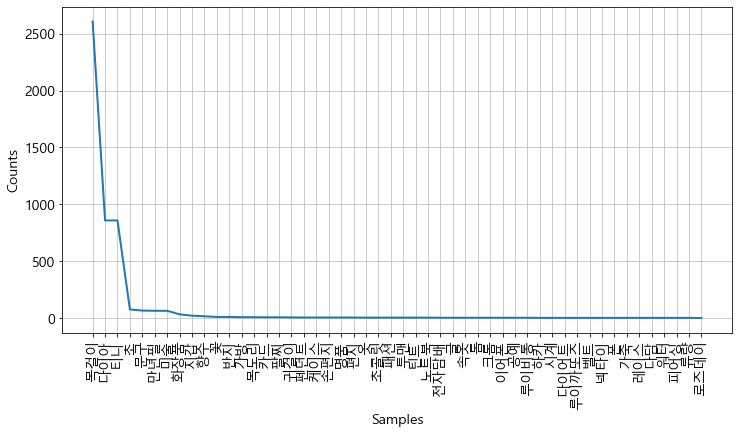

In [53]:
plt.figure(figsize=(12,6))
gifts.plot(50) 
plt.show()

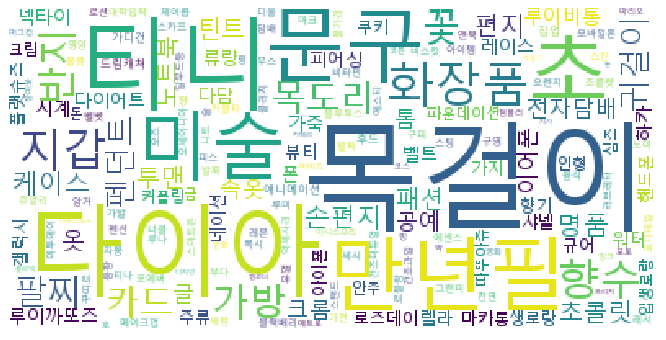

In [54]:
data = gifts.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
mask = np.array(Image.open('data/wc5.heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [56]:

data = gifts.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

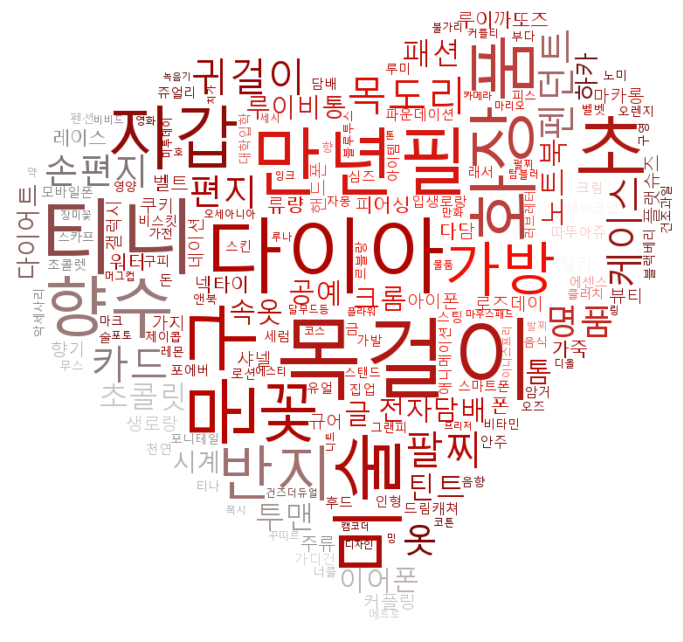

In [57]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()